<a href="https://colab.research.google.com/github/Kaan-wq/ml_tokamak/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score

ModuleNotFoundError: No module named 'sklearn'

In [25]:
# load dataset using pickle
import pickle
with open("../data/dataset_disruption_characterization.pickle", "rb") as f:
    dataset = pickle.load(f)

In [26]:
df_data = pd.DataFrame()

# Loop through each entry in the dataset
for i, entry in enumerate(dataset):
    # Extract data and label from the current entry
    d = entry['x']
    label = entry['y']
    metadata = entry['metadata']
    event = metadata['time_event']

    # Create a DataFrame for the current entry
    df = pd.DataFrame(d['data'], columns=d['columns'])
    df['Time'] = d['time']
    df['Frame'] = range(0, 20)

    if event:
      #Find closest points to time_event
      differences = np.abs(df['Time'] - event)
      closest_indices = np.argsort(differences)[:20]

      #Assign labels to closest points
      df['Label'] = 0
      df.loc[closest_indices, 'Label'] = label
    else:
      df['Label'] = label

    df['Shot'] = metadata['shot']
    df['Window'] = i  # Add the window number

    contains_nan = df.isna().any().any()

    if not contains_nan:
      # Append the current DataFrame to the main DataFrame
      df_data = pd.concat([df_data, df], ignore_index=True)


df_data = df_data.dropna()

display(df_data)
print("Labels count:")
print(f"{df_data['Label'].value_counts()}")

IPLA      IPref      ECEcore   SSXcore        LI       Q95  \
0      1989456.750  1999500.0  1740.929077  0.008850  1.191489  3.874169   
1      1989606.250  1999500.0  1744.737427  0.008850  1.191489  3.874169   
2      1988484.000  1999500.0  1756.823730  0.008698  1.191489  3.874169   
3      1989329.625  1999500.0  1756.823730  0.008469  1.191489  3.874169   
4      1990532.250  1999500.0  1746.057251  0.008850  1.191489  3.874169   
...            ...        ...          ...       ...       ...       ...   
17975  3993662.500  4000500.0  6282.263672  1.416517  0.808256  2.898196   
17976  3995614.250  4000500.0  6303.055664  1.410871  0.808256  2.898196   
17977  3994348.000  4000500.0  6277.216309  1.402783  0.808256  2.898196   
17978  3997734.500  4000500.0  6286.124512  1.391034  0.808256  2.898196   
17979  3995231.500  4000500.0  6317.835449  1.415449  0.808256  2.898196   

          ZMAG     Vloop    Time  Frame  Label   Shot  Window  
0      0.30388 -0.519496  10.361      0      0  81206       0  
1      0.30388 -0.758418  10.362      1      0  81206       0  
2      0.30388 -1.037327  10.363      2      0  81206       0  
3      0.30388 -0.758418  10.364      3      0  81206       0  
4      0.30388  0.237256  10.365      4      0  81206       0  
...        ...       ...     ...    ...    ...    ...     ...  
17975  0.32961 -0.316564   8.622     15      0  98005     905  
17976  0.32961 -0.237256   8.623     16      0  98005     905  
17977  0.32961 -0.238922   8.624     17      0  98005     905  
17978  0.32961  0.279242   8.625     18      0  98005     905  
17979  0.32961 -0.159614   8.626     19      0  98005     905  

[17980 rows x 13 columns]

Labels count:
0    12840
1     4140
2     1000
Name: Label, dtype: int64


#**Unsupervised Learning**

Below we will try various unsupervised learning methods

##**K-Means**

In this section we try a naive k-means solution for 3 clusters.

In [22]:
x = df_data.drop(['Label', 'Window', 'Shot'], axis=1).values
x_pca = PCA(n_components=3).fit(x).transform(x)

print("The features of the first sample are: %s" % x_pca[0])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three PCA components
scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=df_data['Label'], alpha=0.6)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("Original Data in 3D")

# Create a legend
unique_labels = np.unique(df_data['Label'])
colors = scatter.to_rgba(unique_labels)
legend_handles = [mpatches.Patch(color=colors[label], label=f'Label {label}') for label in unique_labels]
ax.legend(handles=legend_handles)

plt.show()

NameError: name 'sklearn' is not defined

In [16]:
dd = PCA(n_components=2).fit(x).transform(x)

# Creating a 1D plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot using the first PCA component
scatter = ax.scatter(dd[:, 0], dd[:, 1], c=df_data['Label'], alpha=0.6)

ax.set_xlabel('PC1')
ax.set_title("Original Data in 2D")
ax.axes.get_yaxis().set_visible(False)  # Hide the y axis

# Create a legend
unique_labels = np.unique(df_data['Label'])
colors = scatter.to_rgba(unique_labels)
legend_handles = [mpatches.Patch(color=colors[label], label=f'Label {label}') for label in unique_labels]
ax.legend(handles=legend_handles)

plt.show()

NameError: name 'PCA' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


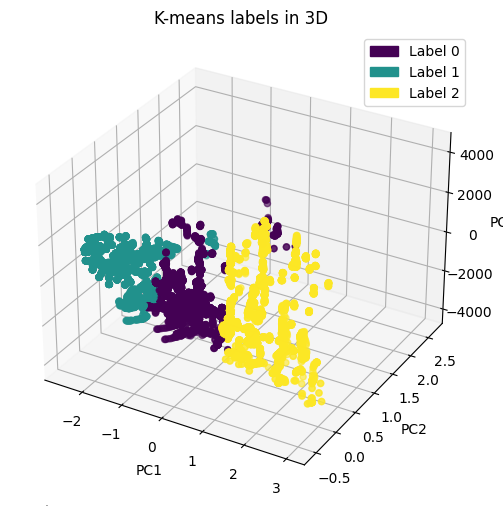

In [ ]:
label = KMeans(n_clusters=3, random_state=0).fit_predict(x)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three PCA components
scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=label, alpha=0.6)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("K-means labels in 3D")

# Create a legend
unique_labels = np.unique(label)
colors = scatter.to_rgba(unique_labels)
legend_handles = [mpatches.Patch(color=colors[label], label=f'Label {label}') for label in unique_labels]
ax.legend(handles=legend_handles)

plt.show()

##**Gaussian Mixture Model**

In this section we try to cluster our data using a GMM with a variety of initialisation methods.

In [ ]:
X = df_data.drop(['Label', 'Window', 'Shot'], axis=1).values
x_pca = PCA(n_components=3).fit(X).transform(X)

clusters = 3
tol = 1e-9
max_iter = 2000

def get_initial_means(X, init_params, r):
    # Run a GaussianMixture with max_iter=0 to output the initialization means
    gmm = GaussianMixture(
        n_components=clusters, init_params=init_params, tol=tol, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_

methods = ["kmeans", "random_from_data", "k-means++", "random"]

labels = []
probas = []

for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)

    ini = get_initial_means(X, method, r)

    gmm = GaussianMixture(
        n_components=clusters, means_init=ini, tol=tol, max_iter=max_iter, random_state=r
    ).fit(X)

    labels.append(gmm.predict(X))
    probas.append(gmm.predict_proba(X))

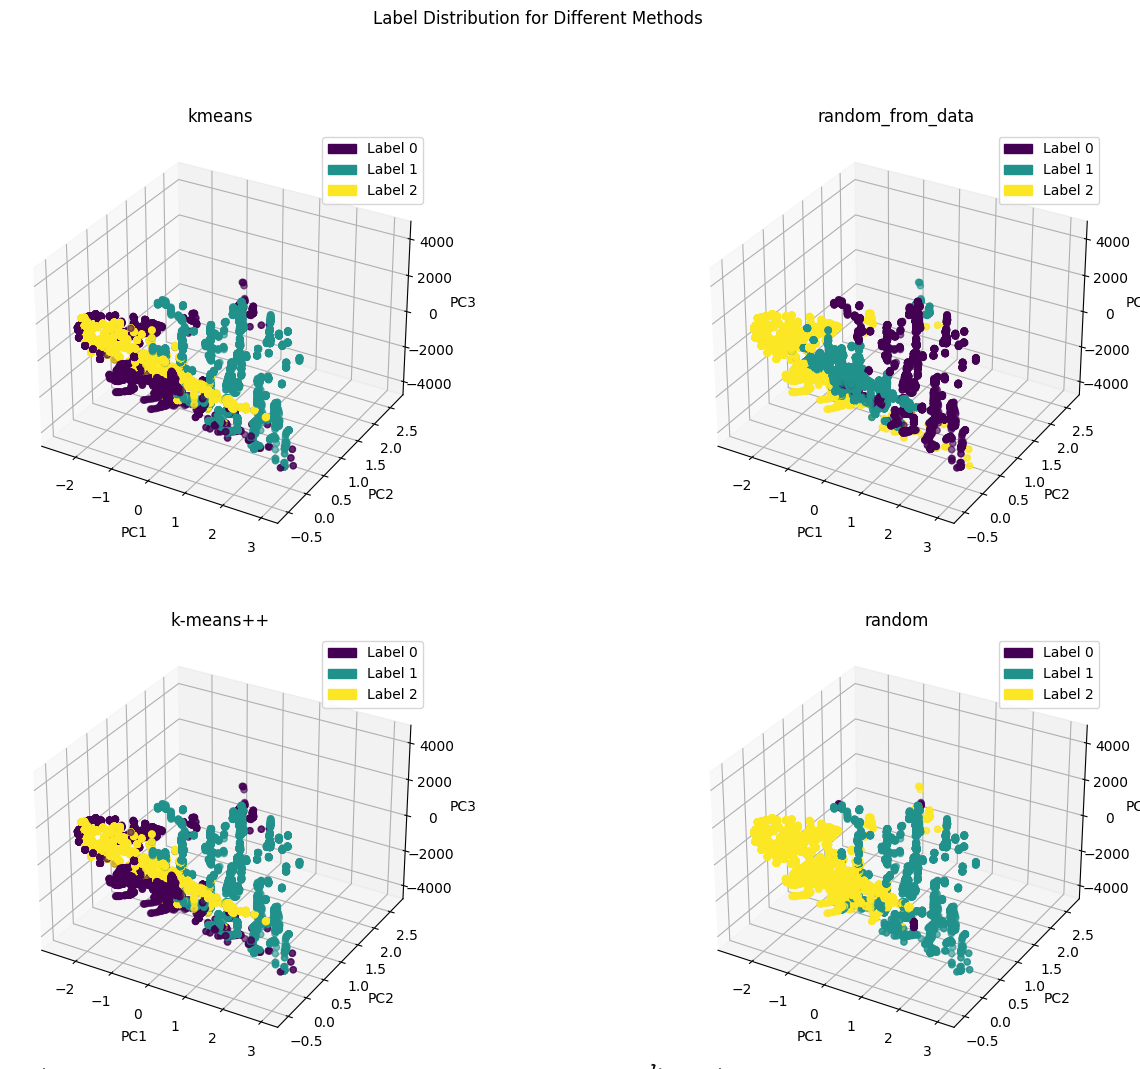

In [ ]:
fig = plt.figure(figsize=(16, 12))

for i, method in enumerate(methods):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')

    # Scatter plot for each method
    scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=labels[i], alpha=0.6)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(method)

    # Create a legend
    unique_labels = np.unique(labels[i])
    colors = scatter.to_rgba(unique_labels)
    legend_handles = [mpatches.Patch(color=colors[label], label=f'Label {label}') for label in unique_labels]
    ax.legend(handles=legend_handles)

plt.suptitle("Label Distribution for Different Methods")
plt.show()

###**Observations**

We see that with k-means ++ initialization we get pretty good results ! \
The clusters are approximately of the same shape of our original data, the only issue is that the labels don't correspond but we can simply intervert them.

In [ ]:
label_map = (labels[2] + 1)%3

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three PCA components
scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=label_map, alpha=0.6)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("K-means++ in 3D")

# Create a legend
unique_labels = np.unique(label_map)
colors = scatter.to_rgba(unique_labels)
legend_handles = [mpatches.Patch(color=colors[label], label=f'Label {label}') for label in unique_labels]
ax.legend(handles=legend_handles)

plt.show()

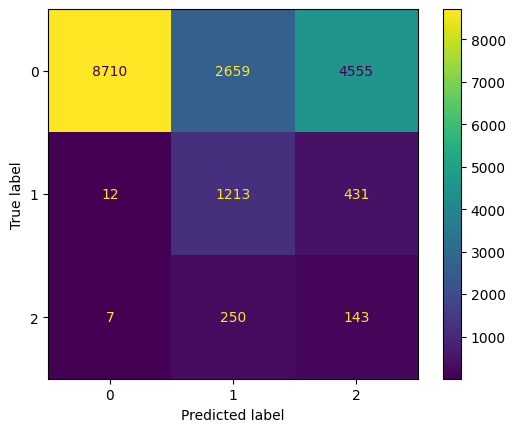

In [ ]:
y_true = df_data['Label'].values
y_pred = label_map

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

# Use 'micro', 'macro', 'weighted', or 'samples' for multiclass classification.
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.5598442714126808
Recall: 0.5598442714126808
F1 Score: 0.665629273538323


##**DB-SCAN**

In this section we try the famous db-scan algorithm to find our clusters.

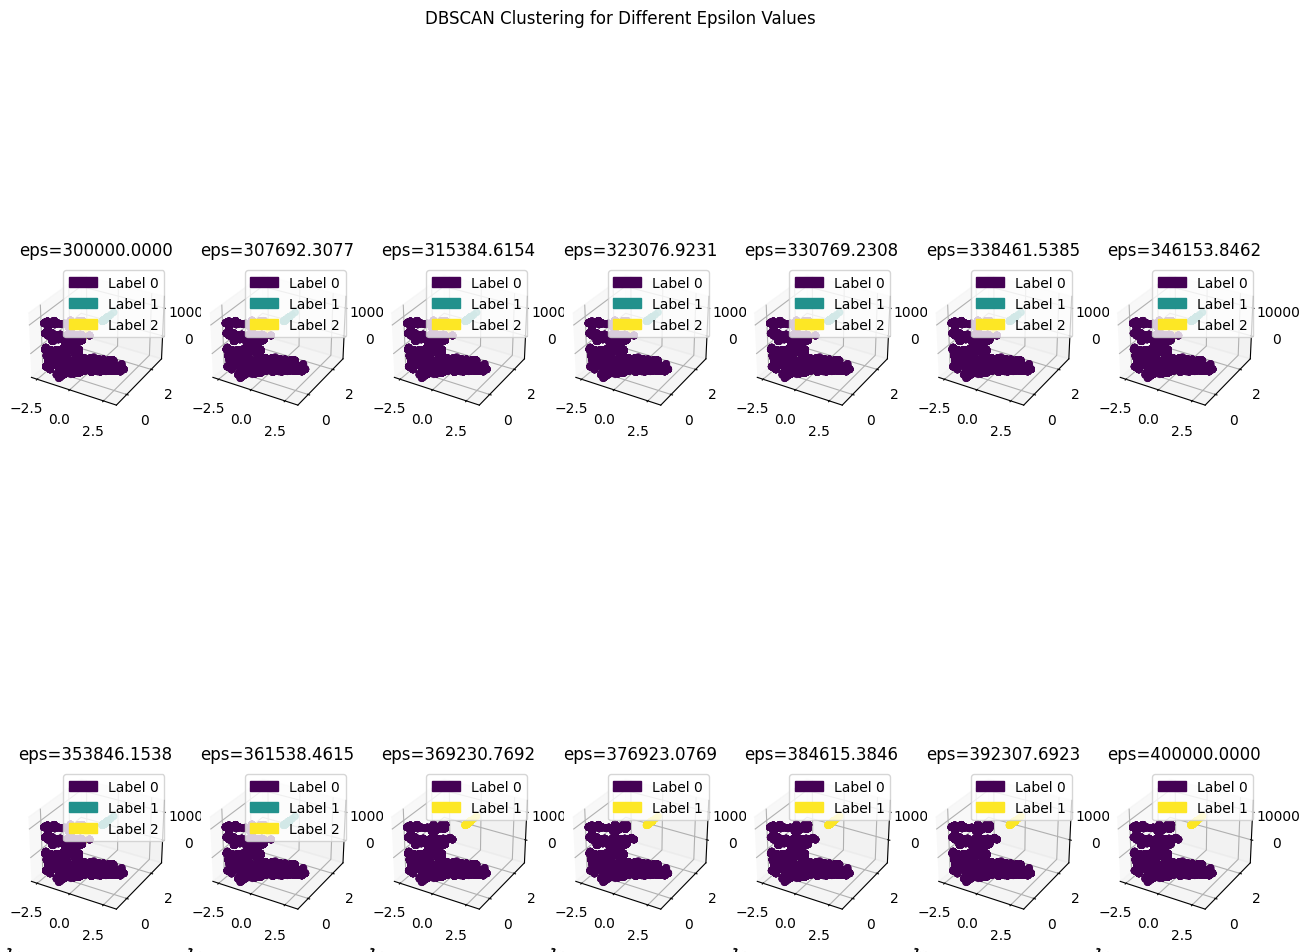

In [ ]:
x = df_data.drop(['Label', 'Window'], axis=1).values
x_pca = PCA(n_components=3).fit(x).transform(x)

eps_list = np.linspace(300000, 400000, 14)

# Compute number of row and columns
COLUMNS = 7
ROWS = math.ceil(len(eps_list) / COLUMNS)

fig = plt.figure(figsize=(16, 12))

for i in range(len(eps_list)):
    ax = fig.add_subplot(ROWS, COLUMNS, i + 1, projection='3d')
    eps = eps_list[i]
    label_scan = DBSCAN(eps=eps).fit_predict(x)

    # Scatter plot for each epsilon value
    scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=label_scan, alpha=0.6)
    ax.set_title(f"eps={eps:.4f}")

    # Create a legend
    unique_labels = np.unique(label_scan)
    colors = scatter.to_rgba(unique_labels)
    legend_handles = [mpatches.Patch(color=colors[label], label=f'Label {label}') for label in unique_labels]
    ax.legend(handles=legend_handles)

plt.suptitle("DBSCAN Clustering for Different Epsilon Values")
plt.show()

We see that the DB-SCAN algorithm is terrible with our data